# Структурные свойства сетей, вершин и ребер сети

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Библиотека по работе с сетями:

In [2]:
import networkx as nx 

Давайте создадим наш первый граф с помощью функций данной библиотеки

In [3]:
G=nx.Graph() # empty graph
G.add_node(1) 
G.add_nodes_from([2,3,4,5])

In [4]:
G.add_edge(1,2)
G.add_edges_from([(1,2),(3,5),(1,3),(1,5),(4,5),(3,4),(2,1), (4,1)])

Теперь будем рисовать граф, для этого нужно рассчитать координаты вершин с помощью встроенных [layout](https://networkx.github.io/documentation/networkx-1.9/reference/drawing.html). Используем [spring_layout](https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html#networkx.drawing.layout.spring_layout), в этом методе используется так называемый [силовой алгоритм](https://en.wikipedia.org/wiki/Force-directed_graph_drawing). В каждую вершину помещается заряд, а ребра заменяются пружиннами. Равновесное состояние такое системы зарядов определяет координатное представление сети. Функция draw самая простая в библиотеке NetworkX....

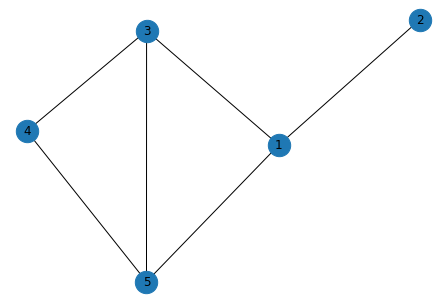

In [5]:
G=nx.Graph()
G.add_edges_from([(1,2),(3,5),(1,3),(1,5),(4,5),(3,4),(2,1)])

pos=nx.spring_layout(G,iterations=10)
nx.draw(G,pos,node_size=500,with_labels=True)
limits=plt.axis('off') 

Еще одно визуальное представление сети - изобразить матрицу смежности:

In [6]:
A=nx.adjacency_matrix(G).todense()
print(A)

[[0 1 1 1 0]
 [1 0 0 0 0]
 [1 0 0 1 1]
 [1 0 1 0 1]
 [0 0 1 1 0]]


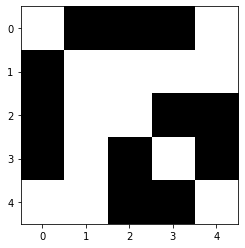

In [7]:
plt.imshow(A,cmap='binary')

## Свойства

Библиотека позволяет работать с различными форматами данных. Загрузим сеть из файла. 

In [8]:
# for google collab 

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

ModuleNotFoundError: No module named 'google'

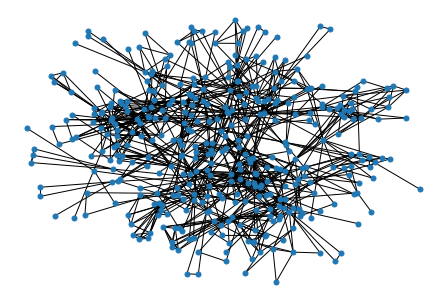

In [9]:
G=nx.read_edgelist('ca-netscience.txt', nodetype=int)

pos=nx.spring_layout(G,iterations=10)
nx.draw(G,pos,node_size=25,with_labels=False)

In [10]:
print(nx.number_of_nodes(G)) 
print(nx.number_of_edges(G))
print(nx.density(G))

379
914
0.012759838617358406


### Degree

In [11]:
G.degree()

DegreeView({2: 2, 1: 10, 3: 2, 4: 34, 5: 27, 16: 21, 44: 4, 113: 15, 131: 12, 250: 6, 259: 3, 13: 9, 14: 4, 15: 16, 45: 10, 46: 8, 47: 8, 61: 4, 126: 6, 127: 6, 128: 8, 146: 3, 152: 1, 153: 3, 154: 3, 164: 4, 165: 4, 166: 4, 176: 8, 177: 8, 249: 3, 274: 2, 313: 5, 314: 5, 323: 4, 324: 4, 330: 4, 371: 2, 373: 4, 374: 3, 199: 7, 201: 14, 202: 7, 204: 6, 231: 14, 235: 2, 236: 10, 237: 4, 238: 4, 254: 2, 298: 4, 66: 6, 112: 3, 114: 6, 115: 5, 135: 9, 136: 2, 189: 3, 312: 2, 352: 6, 353: 6, 354: 6, 355: 6, 356: 6, 91: 8, 92: 8, 130: 6, 132: 7, 133: 6, 134: 6, 17: 9, 18: 8, 19: 3, 20: 2, 278: 2, 279: 2, 334: 8, 366: 4, 367: 4, 368: 4, 129: 3, 327: 3, 340: 2, 341: 2, 147: 2, 148: 2, 200: 3, 203: 3, 258: 5, 245: 6, 252: 2, 253: 2, 26: 27, 232: 5, 233: 5, 234: 3, 239: 7, 240: 7, 246: 7, 257: 5, 297: 2, 247: 3, 7: 6, 6: 2, 8: 12, 190: 4, 191: 2, 192: 3, 193: 3, 62: 4, 63: 3, 64: 3, 65: 10, 137: 4, 342: 3, 343: 3, 344: 1, 25: 3, 27: 3, 28: 3, 40: 9, 95: 17, 104: 5, 105: 4, 106: 9, 107: 8, 108: 7,

In [12]:
degrees=[d for node, d in G.degree()]
print(max(degrees))
print(min(degrees))
print(np.mean(degrees))

34
1
4.823218997361478


In [13]:
print(G.degree(21))

12


Text(0, 0.5, ' P(k)')

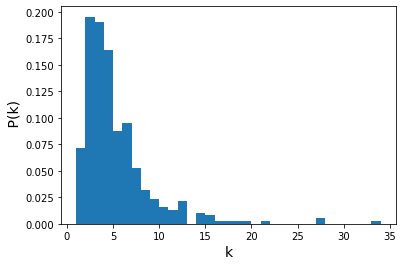

In [14]:
a=plt.hist(degrees,bins=max(degrees)-min(degrees),density=True)
plt.xlabel('k',fontsize=14)
plt.ylabel(' P(k)',fontsize=14)

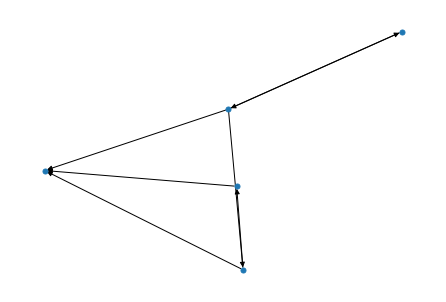

In [15]:
DG=nx.DiGraph() # empty graph
DG.add_node(1) 
DG.add_nodes_from([2,3,4,5])
DG.add_edge(1,2)
DG.add_edges_from([(1,2),(3,5),(1,3),(1,5),(4,5),(3,4),(2,1)])

pos=nx.spring_layout(DG,iterations=10)
nx.draw(DG,pos,node_size=25,with_labels=False)


In [16]:
print(DG.in_degree())
print(DG.out_degree())

[(1, 1), (2, 1), (3, 1), (4, 1), (5, 3)]
[(1, 3), (2, 1), (3, 2), (4, 1), (5, 0)]


### [Clustering](https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.clustering.html)

In [17]:
print(nx.transitivity(G))
print(nx.nx.average_clustering(G))
print(nx.clustering(G,[1,2,3,4,5]))
print(nx.triangles(G,[1,2,3,4,5]))

0.4305750350631136
0.7412306142925664
{1: 0.26666666666666666, 2: 1.0, 3: 1.0, 4: 0.13368983957219252, 5: 0.18233618233618235}
{1: 12, 2: 1, 3: 1, 4: 75, 5: 64}


In [18]:
clust=list(nx.clustering(G).values())

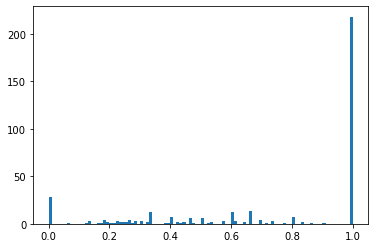

In [19]:
a=plt.hist(clust,bins=100)

### [Paths](https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.shortest_paths.html)

In [20]:
nx.has_path(G,1,15)

True

In [21]:
nx.shortest_path(G,1,15)

[1, 4, 15]

In [22]:
nx.shortest_path_length(G,1,15)

2

In [23]:
print(nx.diameter(G))

17


### [Components](https://networkx.github.io/documentation/networkx-1.9/reference/algorithms.component.html)

In [24]:
nx.is_connected(G)

True

In [25]:
nx.is_strongly_connected(DG)

False

In [28]:
sub_list = list(DG.subgraph(i) for i in nx.strongly_connected_components(DG))

In [29]:
sub_list[3].nodes()

NodeView((1, 2))

In [30]:
subG=nx.subgraph(G,[1,2,3])

In [31]:
print(subG.edges())

[(1, 2), (1, 3), (2, 3)]
